In [139]:
#number of bi-, tri- quadgrams

In [140]:
import pandas as pd
import numpy as np
import jieba
import os, re
import seaborn as sns

### Jieba to split sentences into words, and count the occurances by length

In [141]:
path = "/Users/onyilam/Dropbox/history_textbooks_txt"

# read files by origin as  and split them into sentences

corpus = pd.DataFrame()
for file in os.listdir(path):
    for val in ['tw_', 'ma_', 'hk_']:
        if file.startswith(val):
            print(file)
            with open(os.path.join(path, file), 'r') as f:
                text = f.read()
                text = text.replace('\r', '').replace('\n', '').replace('\t', '')
                indivStr = re.split('。|？|:', text)
                #indivStr = re.split('---------', text)
                df = pd.DataFrame(indivStr)
                df['origin'] = val[:-1]
                df['book'] = file
                corpus = corpus.append(df)
                
                

ma_人民版高中历史必修一现代中国部分.txt
tw_龙腾.txt
ma_人民版高中历史必修二现代中国部分.txt
tw_南一第二.txt
ma_人教版高中历史必修二现代中国部分.txt
ma_人教版高中历史必修一现代中国部分.txt
ma_岳麓版高中历史必修三现代中国部分.txt
hk_現代5上.txt
hk_現代5下.txt
tw_康熹.txt
hk_現代4下.txt
hk_文達必修6.txt
ma_人民版高中历史必修三现代中国部分.txt
hk_文達必修5.txt
hk_文達必修4.txt
ma_岳麓版高中历史必修一现代中国部分.txt
ma_人教版高中历史必修三现代中国部分.txt
ma_岳麓版高中历史必修二现代中国部分.txt


In [142]:
corpus.columns = ['sentence', 'origin', 'book']
#remove empty rows
corpus = corpus[corpus['sentence']!=""]
# dummify the origin variable
corpus = pd.concat( [corpus, pd.get_dummies(corpus['origin'])], axis = 1)

In [143]:
corpus['segments'] = corpus['sentence'].apply(lambda x: ", ".join(jieba.cut(x)).split(", "))

corpus['bigrams'] = corpus['segments'].apply(lambda x: len([ w for w in x if len(w)==2]))
corpus['trigrams'] = corpus['segments'].apply(lambda x: len([ w for w in x if len(w)==3]))
corpus['quadgrams'] = corpus['segments'].apply(lambda x: len([ w for w in x if len(w)==4]))
corpus['long_grams'] = corpus['segments'].apply(lambda x: len([ w for w in x if len(w)>4]))

In [144]:
def char_count(sent):
    #remove punctuation
    punc = "！？｡。＂＃＄％＆＇（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏."
    sent = re.sub(r"[%s]+" %punc, "", sent)
    return len(sent)

In [145]:
corpus['num_char'] = corpus['sentence'].apply(lambda x: char_count(x))

In [146]:
print(corpus.groupby(['origin'])['bigrams'].sum()/corpus.groupby(['origin'])['num_char'].sum())
print(corpus.groupby(['origin'])['trigrams'].sum()/corpus.groupby(['origin'])['num_char'].sum())
print(corpus.groupby(['origin'])['quadgrams'].sum()/corpus.groupby(['origin'])['num_char'].sum())

origin
hk    0.297538
ma    0.262549
tw    0.307110
dtype: float64
origin
hk    0.031847
ma    0.029188
tw    0.030497
dtype: float64
origin
hk    0.035031
ma    0.047332
tw    0.031232
dtype: float64


In [147]:
t = pd.DataFrame(corpus.groupby(['origin'])['bigrams'].sum()/corpus.groupby(['origin'])['num_char'].sum()
            ).reset_index().rename(columns={0:'bigrams'})

t = pd.merge(t, pd.DataFrame(corpus.groupby(['origin'])['trigrams'].sum()/corpus.groupby(['origin'])['num_char'].sum()
            ).reset_index().rename(columns={0:'trigrams'}),
         on = 'origin')

t = pd.merge(t, pd.DataFrame(corpus.groupby(['origin'])['quadgrams'].sum()/corpus.groupby(['origin'])['num_char'].sum()
            ).reset_index().rename(columns={0:'quadgrams'}),
             on = 'origin')


t

,origin,bigrams,trigrams,quadgrams
0,hk,0.297538,0.031847,0.035031
1,ma,0.262549,0.029188,0.047332
2,tw,0.307110,0.030497,0.031232


### Pre and Post 1949

In [148]:
path = "/Users/onyilam/Dropbox/history_textbooks_txt/Events/Post1949"

# read files by origin as  and split them into sentences

corpus49 = pd.DataFrame()
for file in os.listdir(path):
    for val in ['tw_', 'ma_', 'hk_']:
        if file.startswith(val) and 'old' not in file and 'all3' not in file: #excludes all3 from the filename
            print(file)
            with open(os.path.join(path, file), 'r') as f:
                text = f.read()
                text = text.replace('\r', '').replace('\n', '').replace('\t', '')
                #indivStr = re.split('。|？|:', text)
                indivStr = re.split('---------', text)
                df = pd.DataFrame(indivStr)
                df['origin'] = val[:-1]
                df['book'] = file
                if 'pre' in file:
                    df['period'] = 'pre'
                else:
                    df['period']='post'
                corpus49 = corpus49.append(df)
                
                

tw_龙腾pre1949.txt
ma_岳麓版pre1949.txt
hk_現代pre1949.txt
tw_南一post1949.txt
ma_岳麓版高中历史必修一post1949.txt
tw_康熹post1949.txt
ma_人民版pre1949.txt
ma_人民版高中历史必修post1949.txt
ma_人教版高中历史必修一post1949.txt
tw_康熹pre1949.txt
hk_文達post1949.txt
ma_人教版pre1949.txt
hk_文達pre1949.txt
hk_現代post1949.txt
tw_南一pre1949.txt
tw_龙腾post1949.txt


In [149]:
corpus49.columns = ['sentence', 'origin', 'book', 'period']
#remove empty rows
corpus49 = corpus49[corpus49['sentence']!=""]

In [150]:
corpus49['segments'] = corpus49['sentence'].apply(lambda x: ", ".join(jieba.cut(x)).split(", "))

corpus49['bigrams'] = corpus49['segments'].apply(lambda x: len([ w for w in x if len(w)==2]))
corpus49['trigrams'] = corpus49['segments'].apply(lambda x: len([ w for w in x if len(w)==3]))
corpus49['quadgrams'] = corpus49['segments'].apply(lambda x: len([ w for w in x if len(w)==4]))
corpus49['long_grams'] = corpus49['segments'].apply(lambda x: len([ w for w in x if len(w)>4]))

corpus49['num_char'] = corpus49['sentence'].apply(lambda x: char_count(x))

In [151]:
t2 = pd.DataFrame(corpus49.groupby(['origin', 'period'])['bigrams'].sum()/corpus49.groupby(['origin', 'period'])['num_char'].sum()
            ).reset_index().rename(columns={0:'bigrams'})

t2 = pd.merge(t2, pd.DataFrame(corpus49.groupby(['origin', 'period'])['trigrams'].sum()/corpus49.groupby(['origin', 'period'])['num_char'].sum()
            ).reset_index().rename(columns={0:'trigrams'}),
         on = ['origin', 'period'])

t2 = pd.merge(t2, pd.DataFrame(corpus49.groupby(['origin', 'period'])['quadgrams'].sum()/corpus49.groupby(['origin', 'period'])['num_char'].sum()
            ).reset_index().rename(columns={0:'quadgrams'}),
             on = ['origin', 'period'])

t2

,origin,period,bigrams,trigrams,quadgrams
0,hk,post,0.281822,0.030292,0.042716
1,hk,pre,0.306796,0.032759,0.030258
2,ma,post,0.243666,0.021339,0.052500
3,ma,pre,0.267452,0.036067,0.044094
4,tw,post,0.302038,0.030448,0.033949
5,tw,pre,0.309055,0.030515,0.030184


In [152]:
t['period'] = 'all'
t3 = t.append(t2)

In [153]:
t3

,origin,bigrams,trigrams,quadgrams,period
0,hk,0.297538,0.031847,0.035031,all
1,ma,0.262549,0.029188,0.047332,all
2,tw,0.307110,0.030497,0.031232,all
0,hk,0.281822,0.030292,0.042716,post
1,hk,0.306796,0.032759,0.030258,pre
2,ma,0.243666,0.021339,0.052500,post
3,ma,0.267452,0.036067,0.044094,pre
4,tw,0.302038,0.030448,0.033949,post
5,tw,0.309055,0.030515,0.030184,pre


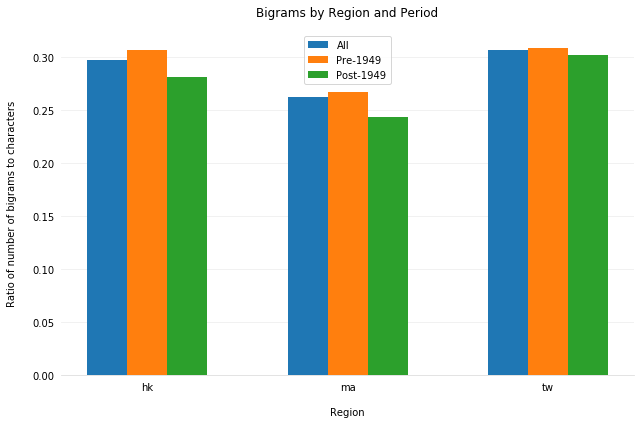

In [154]:
## Plot - Grouped bar chart
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(len(t3.origin.unique()))
bar_width = 0.2
b1 = ax.bar(x, t3.loc[t3['period'] == 'all', 'bigrams'],
            width=bar_width, label = 'All')
b2 = ax.bar(x + bar_width, t3.loc[t3['period'] == 'pre', 'bigrams'],
            width=bar_width, label = 'Pre-1949')
b3 = ax.bar(x + 2*bar_width, t3.loc[t3['period'] == 'post', 'bigrams'],
            width=bar_width, label = 'Post-1949')

# Fix the x-axes.
ax.set_xticks(x + bar_width)
ax.set_xticklabels(t3.origin.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=15)
ax.set_ylabel('Ratio of number of bigrams to characters', labelpad=15)
ax.set_title('Bigrams by Region and Period', pad=15)

fig.tight_layout()

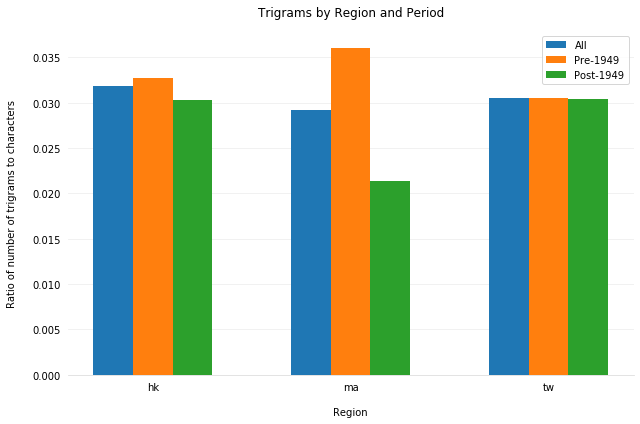

In [155]:
## Plot - Grouped bar chart
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(len(t3.origin.unique()))
bar_width = 0.2
b1 = ax.bar(x, t3.loc[t3['period'] == 'all', 'trigrams'],
            width=bar_width, label = 'All')
b2 = ax.bar(x + bar_width, t3.loc[t3['period'] == 'pre', 'trigrams'],
            width=bar_width, label = 'Pre-1949')
b3 = ax.bar(x + 2*bar_width, t3.loc[t3['period'] == 'post', 'trigrams'],
            width=bar_width, label = 'Post-1949')

# Fix the x-axes.
ax.set_xticks(x + bar_width)
ax.set_xticklabels(t3.origin.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=15)
ax.set_ylabel('Ratio of number of trigrams to characters', labelpad=15)
ax.set_title('Trigrams by Region and Period', pad=15)

fig.tight_layout()

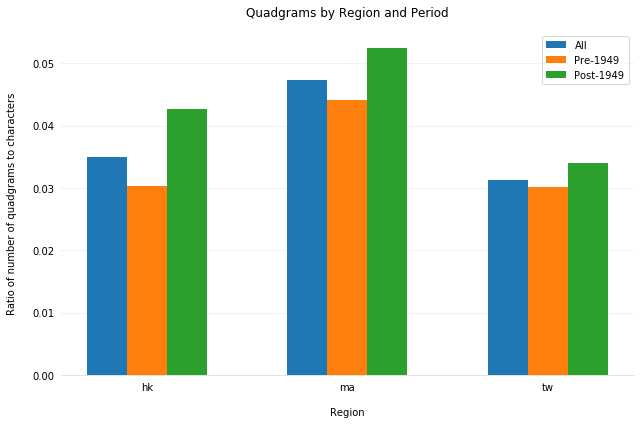

In [156]:
## Plot - Grouped bar chart
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(len(t3.origin.unique()))
bar_width = 0.2
b1 = ax.bar(x, t3.loc[t3['period'] == 'all', 'quadgrams'],
            width=bar_width, label = 'All')
b2 = ax.bar(x + bar_width, t3.loc[t3['period'] == 'pre', 'quadgrams'],
            width=bar_width, label = 'Pre-1949')
b3 = ax.bar(x + 2*bar_width, t3.loc[t3['period'] == 'post', 'quadgrams'],
            width=bar_width, label = 'Post-1949')

# Fix the x-axes.
ax.set_xticks(x + bar_width)
ax.set_xticklabels(t3.origin.unique())

# Add legend.
ax.legend()

# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=15)
ax.set_ylabel('Ratio of number of quadgrams to characters', labelpad=15)
ax.set_title('Quadgrams by Region and Period', pad=15)

fig.tight_layout()

## Average + Dispersion of length of words

In [157]:

def avg_word_leng(seg):
    #remove punctuation
    punc = "！？｡。＂＃＄％＆＇（）（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏."
    punc_list = [p for p in punc]
    
    seg_list = [''.join(c for c in s if c not in punc_list) for s in seg]
    seg_list = [s for s in seg_list if s and s!= ' ']
    
    return sum(map(len, seg_list))/float(len(seg_list))

In [158]:
def dispersion_word_leng(seg):
    punc = "！？｡。＂＃＄％＆＇（）（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏."
    punc_list = [p for p in punc]
    
    seg_list = [''.join(c for c in s if c not in punc_list) for s in seg]
    seg_list_len = [len(s) for s in seg_list if s and s!= ' ']
    
    return np.std(seg_list_len)
    

In [159]:
# group by version, and calculate the average word length
corpus['origin'] = corpus['book'].str[:2]
corpus_grouped = corpus.groupby(['origin'])['segments'].apply(list).reset_index()


In [160]:
corpus_grouped['segments']=corpus_grouped['segments'].apply(lambda l: [item for sublist in l for item in sublist])

In [161]:
corpus_grouped['avg_word_leng'] = corpus_grouped['segments'].apply(lambda x: avg_word_leng(x))
corpus_grouped['std_word_leng'] = corpus_grouped['segments'].apply(lambda x: dispersion_word_leng(x))

In [162]:
corpus_grouped.head()

,origin,segments,avg_word_leng,std_word_leng
0,hk,"[课题, 一, 民初, 政局, 第一章, 袁世凯, 的, 帝制, 运动, , 中华民国, ...",1.934333,0.848320
1,ma,"[从, 1840, 年, 开始, ，, 为, 打开, 中国, 的, 大门, ，, 列强, 凭...",2.036247,1.031582
2,tw,"[第四篇, , 近代, 的, 冲击, 至, 晚清, 第九章, , 敌国, 的, 倾颓, ...",1.913892,0.816199


#### Pre- and post 1949

In [163]:
corpus_grouped['period'] = 'all'

In [164]:
len(corpus49)

16

In [165]:

corpus49_grouped =  corpus49.groupby(['origin', 'period']).agg({'segments': 'sum'}).reset_index()
corpus49_grouped['avg_word_leng'] = corpus49_grouped['segments'].apply(lambda x: avg_word_leng(x))
corpus49_grouped['std_word_leng'] = corpus49_grouped['segments'].apply(lambda x: dispersion_word_leng(x))

In [166]:
corpus49_grouped

,origin,period,segments,avg_word_leng,std_word_leng
0,hk,post,"[第一节, , 建国初期, 巩固政权, 的, 措施, 中华人民共和国, 成立, 後, 面对...",1.969459,0.919408
1,hk,pre,"[课题, 一, , 列强, 的, 入侵, 第一章, 中, 英, 鸦片战争, 乾隆, 晚年,...",1.913129,0.802170
2,ma,post,"[第六, 单元, , 中国, 社会主义, 的, 政治, 建设, 与, 祖国统一, 经历, ...",2.099052,1.238379
3,ma,pre,"[第四, 单元, , 内忧外患, 与, 中华民族, 的, 奋起, 当, 欧洲, 、, 北美...",2.032527,0.976407
4,tw,post,"[P.199, 建国初期, 的, 统治, （, 一, ）, 一, 党专政, 中华人民, 公和...",1.951638,0.858124
5,tw,pre,"[第四篇, , 近代, 的, 冲击, 至, 晚清, 第九章, , 敌国, 的, 倾颓, ...",1.899693,0.799456


In [167]:
#corpus49['version'] = corpus49_gro['book'].str[:5]
# corpus49_grouped = corpus49_grouped[['version', 'segments', 'avg_word_leng', 'period']]

In [168]:
df = corpus_grouped.append(corpus49_grouped)

In [169]:
df

,origin,segments,avg_word_leng,std_word_leng,period
0,hk,"[课题, 一, 民初, 政局, 第一章, 袁世凯, 的, 帝制, 运动, , 中华民国, ...",1.934333,0.848320,all
1,ma,"[从, 1840, 年, 开始, ，, 为, 打开, 中国, 的, 大门, ，, 列强, 凭...",2.036247,1.031582,all
2,tw,"[第四篇, , 近代, 的, 冲击, 至, 晚清, 第九章, , 敌国, 的, 倾颓, ...",1.913892,0.816199,all
0,hk,"[第一节, , 建国初期, 巩固政权, 的, 措施, 中华人民共和国, 成立, 後, 面对...",1.969459,0.919408,post
1,hk,"[课题, 一, , 列强, 的, 入侵, 第一章, 中, 英, 鸦片战争, 乾隆, 晚年,...",1.913129,0.802170,pre
2,ma,"[第六, 单元, , 中国, 社会主义, 的, 政治, 建设, 与, 祖国统一, 经历, ...",2.099052,1.238379,post
3,ma,"[第四, 单元, , 内忧外患, 与, 中华民族, 的, 奋起, 当, 欧洲, 、, 北美...",2.032527,0.976407,pre
4,tw,"[P.199, 建国初期, 的, 统治, （, 一, ）, 一, 党专政, 中华人民, 公和...",1.951638,0.858124,post
5,tw,"[第四篇, , 近代, 的, 冲击, 至, 晚清, 第九章, , 敌国, 的, 倾颓, ...",1.899693,0.799456,pre


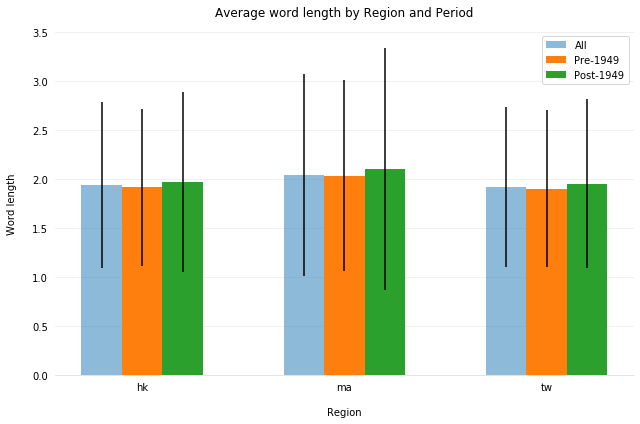

In [170]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(9, 6))
x = np.arange(len(df.origin.unique()))
bar_width = 0.2
b1 = ax.bar(x, df.loc[df['period'] == 'all', 'avg_word_leng'], yerr=df.loc[df['period'] == 'all', 'std_word_leng'], 
            width=bar_width,  align='center', alpha=0.5, label = 'All')
b2 = ax.bar(x + bar_width, df.loc[df['period'] == 'pre', 'avg_word_leng'],yerr=df.loc[df['period'] == 'pre', 'std_word_leng'], 
            width=bar_width,  align='center', label = 'Pre-1949')
b3 = ax.bar(x + 2*bar_width, df.loc[df['period'] == 'post', 'avg_word_leng'],yerr=df.loc[df['period'] == 'post', 'std_word_leng'], 
            width=bar_width,  align='center', label = 'Post-1949')

# Add legend.
ax.legend()

# Fix the x-axes.
ax.set_xticks(x + bar_width)
ax.set_xticklabels(t3.origin.unique())


# Axis styling.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add axis and chart labels.
ax.set_xlabel('Region', labelpad=15)
ax.set_ylabel('Word length', labelpad=15)
ax.set_title('Average word length by Region and Period', pad=15)

fig.tight_layout()

## High Frequency Words

In [227]:
from collections import Counter

def highest_freq(seg, n=10, l=2):
    """
    return list of top words of length l 
    """
    #remove punctuation
    punc = "！？｡。＂＃＄％＆＇（）（）＊＋，－／：；＜＝＞＠［＼］＾＿｀｛｜｝～｟｠｢｣､、〃《》「」『』【】〔〕〖〗〘〙〚〛〜〝〞〟〰〾〿–—‘’‛“”„‟…‧﹏."
    punc_list = [p for p in punc]
    
    seg_list = [''.join(c for c in s if c not in punc_list) for s in seg]
    seg_list = [s for s in seg_list if s and s!= ' ' and len(s)==l]
    return Counter(seg_list).most_common(n)
    
    
    

In [413]:
corpus_grouped['high_freq_bi'] =corpus_grouped.apply(lambda x: highest_freq(x.segments, n=40), axis=1)
corpus_grouped['high_freq_tri'] =corpus_grouped.apply(lambda x: highest_freq(x.segments, n=20, l=3), axis=1)
corpus_grouped['high_freq_quad'] =corpus_grouped.apply(lambda x: highest_freq(x.segments, n=20, l=4), axis=1)

In [415]:
corpus49_grouped['high_freq_bi'] =corpus49_grouped.apply(lambda x: highest_freq(x.segments, n=20), axis=1)
corpus49_grouped['high_freq_tri'] =corpus49_grouped.apply(lambda x: highest_freq(x.segments, n=20, l=3), axis=1)
corpus49_grouped['high_freq_quad'] =corpus49_grouped.apply(lambda x: highest_freq(x.segments, n=20, l=4), axis=1)

In [414]:
corpus_grouped.head()

,origin,segments,avg_word_leng,std_word_leng,period,high_freq_bi,high_freq_quad,tf_bi,tf_quad,tf-idf_bi,tf-idf_quad,max_tfidf_bi,max_tfidf_quad,high_freq_tri
0,hk,"[课题, 一, 民初, 政局, 第一章, 袁世凯, 的, 帝制, 运动, , 中华民国, ...",1.934333,0.848320,all,"[(中国, 1362), (日本, 455), (中共, 374), (发展, 333), ...","[(社会主义, 137), (国民政府, 95), (知识分子, 71), (中央政府, 7...","{'中国': 0.015288425920729175, '日本': 0.005107366...","{'社会主义': 0.0015378225779294399, '国民政府': 0.0010...","{'中国': 0.0, '日本': 0.0, '中共': 0.001702200662638...","{'社会主义': 0.0, '国民政府': 0.0, '知识分子': 0.0, '中央政府'...",英国,中央政府,"[(国民党, 225), (袁世凯, 194), (毛泽东, 179), (孙中山, 131..."
1,ma,"[从, 1840, 年, 开始, ，, 为, 打开, 中国, 的, 大门, ，, 列强, 凭...",2.036247,1.031582,all,"[(中国, 1524), (发展, 487), (建设, 270), (国家, 262), ...","[(社会主义, 354), (资产阶级, 111), (资本主义, 104), (帝国主义,...","{'中国': 0.01872626961404716, '发展': 0.0059840507...","{'社会主义': 0.004349802784365285, '资产阶级': 0.00136...","{'中国': 0.0, '发展': 0.0, '建设': 0.003644806875396...","{'社会主义': 0.0, '资产阶级': 0.0014984206043296533, '...",建设,资产阶级,"[(毛泽东, 135), (清政府, 99), (孙中山, 92), (国民党, 80), ..."
2,tw,"[第四篇, , 近代, 的, 冲击, 至, 晚清, 第九章, , 敌国, 的, 倾颓, ...",1.913892,0.816199,all,"[(中国, 606), (中共, 219), (发展, 188), (民国, 186), (...","[(国民政府, 106), (知识分子, 87), (太平天国, 51), (中华民国, 4...","{'中国': 0.009098006245496037, '中共': 0.003287893...","{'国民政府': 0.0015914004323804949, '知识分子': 0.0013...","{'中国': 0.0, '中共': 0.0013331260310426377, '发展':...","{'国民政府': 0.0, '知识分子': 0.0, '太平天国': 0.000310454...",民国,另一方面,"[(国民党, 127), (毛泽东, 92), (孙中山, 89), (袁世凯, 83), ..."


## Most Unique Words - TF-IDF

We are essentially calculating the most important word within the set of most-frequenly occured words. If a word exists in all docs, the idf will = 0
We also calculate that by bigrams, and quadgrams

In [349]:
def tf(seg, l):
    """
    The number of times a word appears in a document divded by the total number of words in the document. 
    """
    # divide each word in the list by the total number of words 
    tf_list = {}
    for w in seg:
        tf = w[1]/l
        tf_list[w[0]] = tf
        
    return tf_list
    

In [416]:
corpus_grouped['tf_bi']=corpus_grouped.apply(lambda x: tf(x.high_freq_bi, len(x.segments)), axis=1)
corpus_grouped['tf_tri']=corpus_grouped.apply(lambda x: tf(x.high_freq_tri, len(x.segments)), axis=1)
corpus_grouped['tf_quad']=corpus_grouped.apply(lambda x: tf(x.high_freq_quad, len(x.segments)), axis=1)


corpus49_grouped['tf_bi']=corpus49_grouped.apply(lambda x: tf(x.high_freq_bi, len(x.segments)), axis=1)
corpus49_grouped['tf_tri']=corpus49_grouped.apply(lambda x: tf(x.high_freq_tri, len(x.segments)), axis=1)
corpus49_grouped['tf_quad']=corpus49_grouped.apply(lambda x: tf(x.high_freq_quad, len(x.segments)), axis=1)

In [417]:

# number of docs that contains the word

# consolidate all the bigrams in the list

def idf_list(df, ngram = 'bi'):
    
    """
    calculate idf based on how many times the word shows up as the most popular words across all documents
    """
    if ngram =='bi':
        word_list = df['high_freq_bi'].tolist()
    elif ngram=='quad':
        word_list = df['high_freq_quad'].tolist()
    elif ngram=='tri':
        word_list = df['high_freq_tri'].tolist()
    wl = [ [b[0] for b in a] for a in word_list ]
    
    word_list = [item for sublist in word_list for item in sublist]
    words = []
    for w in word_list:
        words.append(w[0])

    # consolidate all segments to one list of list
    segment_list = df['segments'].tolist()

    words = list(set(words))
    # number oft times it appears in each document:
    # initialize count to 0 for each word
    doc_count ={w: 0 for w in words}
    idf_list = {}
    for w in words:
        for s in wl:
            if w in s:
                doc_count[w] += 1
        

        idf = np.log(len(segment_list)/doc_count[w])
        idf_list[w] = idf
    
    return idf_list
    

In [418]:
idf_list_all = idf_list(df = corpus_grouped)
idf_list_tri_all = idf_list(df = corpus_grouped, ngram='tri')
idf_list_quad_all = idf_list(df = corpus_grouped, ngram='quad')

idf49_list_all = idf_list(df = corpus49_grouped)
idf49_list_tri_all = idf_list(df = corpus49_grouped, ngram='tri')
idf49_list_quad_all = idf_list(df = corpus49_grouped, ngram='quad')



In [420]:
def tfidf_bi(tf, l='bi', group ='all'):
    tfidf = {}
    if group=='all':
        if l =='bi':
            for w in tf.keys():
                tfidf[w] = tf[w]*idf_list_all[w]
        elif l=='quad':
            for w in tf.keys():
                tfidf[w] = tf[w]*idf_list_quad_all[w]
        elif l=='tri':
            for w in tf.keys():
                tfidf[w] = tf[w]*idf_list_tri_all[w]
    elif group=='49':
        if l =='bi':
            for w in tf.keys():
                tfidf[w] = tf[w]*idf49_list_all[w]
        elif l=='quad':
            for w in tf.keys():
                tfidf[w] = tf[w]*idf49_list_quad_all[w]
        elif l=='tri':
            for w in tf.keys():
                tfidf[w] = tf[w]*idf49_list_tri_all[w]
        
   
    return tfidf


In [422]:
corpus_grouped['tf-idf_bi'] = corpus_grouped.apply(lambda x: tfidf_bi(x.tf_bi, l='bi'), axis = 1)
corpus_grouped['tf-idf_tri'] = corpus_grouped.apply(lambda x: tfidf_bi(x.tf_tri, l='tri'), axis = 1)
corpus_grouped['tf-idf_quad'] = corpus_grouped.apply(lambda x: tfidf_bi(x.tf_quad, l='quad'), axis = 1)


corpus49_grouped['tf-idf_bi'] = corpus49_grouped.apply(lambda x: tfidf_bi(x.tf_bi, l='bi', group='49'), axis = 1)
corpus49_grouped['tf-idf_tri'] = corpus49_grouped.apply(lambda x: tfidf_bi(x.tf_tri, l='tri', group='49'), axis = 1)
corpus49_grouped['tf-idf_quad'] = corpus49_grouped.apply(lambda x: tfidf_bi(x.tf_quad, l='quad', group='49'), axis = 1)

In [423]:
import operator

corpus_grouped['max_tfidf_bi'] = corpus_grouped['tf-idf_bi'].apply(lambda x: max(x.items(), key=operator.itemgetter(1))[0])
corpus_grouped['max_tfidf_tri'] = corpus_grouped['tf-idf_tri'].apply(lambda x: max(x.items(), key=operator.itemgetter(1))[0])
corpus_grouped['max_tfidf_quad'] = corpus_grouped['tf-idf_quad'].apply(lambda x: max(x.items(), key=operator.itemgetter(1))[0])


corpus49_grouped['max_tfidf_bi'] = corpus49_grouped['tf-idf_bi'].apply(lambda x: max(x.items(), key=operator.itemgetter(1))[0])

corpus49_grouped['max_tfidf_tri'] = corpus49_grouped['tf-idf_tri'].apply(lambda x: max(x.items(), key=operator.itemgetter(1))[0])
corpus49_grouped['max_tfidf_quad'] = corpus49_grouped['tf-idf_quad'].apply(lambda x: max(x.items(), key=operator.itemgetter(1))[0])

In [424]:
corpus_grouped

,origin,segments,avg_word_leng,std_word_leng,period,high_freq_bi,high_freq_quad,tf_bi,tf_quad,tf-idf_bi,tf-idf_quad,max_tfidf_bi,max_tfidf_quad,high_freq_tri,tf_tri,tf-idf_tri,max_tfidf_tri
0,hk,"[课题, 一, 民初, 政局, 第一章, 袁世凯, 的, 帝制, 运动, , 中华民国, ...",1.934333,0.848320,all,"[(中国, 1362), (日本, 455), (中共, 374), (发展, 333), ...","[(社会主义, 137), (国民政府, 95), (知识分子, 71), (中央政府, 7...","{'中国': 0.015288425920729175, '日本': 0.005107366...","{'社会主义': 0.0015378225779294399, '国民政府': 0.0010...","{'中国': 0.0, '日本': 0.0, '中共': 0.001702200662638...","{'社会主义': 0.0, '国民政府': 0.0, '知识分子': 0.0, '中央政府'...",英国,中央政府,"[(国民党, 225), (袁世凯, 194), (毛泽东, 179), (孙中山, 131...","{'国民党': 0.0025256210221468903, '袁世凯': 0.002177...","{'国民党': 0.0, '袁世凯': 0.0, '毛泽东': 0.0, '孙中山': 0....",共产党
1,ma,"[从, 1840, 年, 开始, ，, 为, 打开, 中国, 的, 大门, ，, 列强, 凭...",2.036247,1.031582,all,"[(中国, 1524), (发展, 487), (建设, 270), (国家, 262), ...","[(社会主义, 354), (资产阶级, 111), (资本主义, 104), (帝国主义,...","{'中国': 0.01872626961404716, '发展': 0.0059840507...","{'社会主义': 0.004349802784365285, '资产阶级': 0.00136...","{'中国': 0.0, '发展': 0.0, '建设': 0.003644806875396...","{'社会主义': 0.0, '资产阶级': 0.0014984206043296533, '...",建设,资产阶级,"[(毛泽东, 135), (清政府, 99), (孙中山, 92), (国民党, 80), ...","{'毛泽东': 0.001658823095732524, '清政府': 0.0012164...","{'毛泽东': 0.0, '清政府': 0.0013364291876453666, '孙中...",清政府
2,tw,"[第四篇, , 近代, 的, 冲击, 至, 晚清, 第九章, , 敌国, 的, 倾颓, ...",1.913892,0.816199,all,"[(中国, 606), (中共, 219), (发展, 188), (民国, 186), (...","[(国民政府, 106), (知识分子, 87), (太平天国, 51), (中华民国, 4...","{'中国': 0.009098006245496037, '中共': 0.003287893...","{'国民政府': 0.0015914004323804949, '知识分子': 0.0013...","{'中国': 0.0, '中共': 0.0013331260310426377, '发展':...","{'国民政府': 0.0, '知识分子': 0.0, '太平天国': 0.000310454...",民国,另一方面,"[(国民党, 127), (毛泽东, 92), (孙中山, 89), (袁世凯, 83), ...","{'国民党': 0.0019066778765313476, '毛泽东': 0.001381...","{'国民党': 0.0, '毛泽东': 0.0, '孙中山': 0.0, '袁世凯': 0....",蒋中正


In [425]:
corpus49_grouped

,origin,period,segments,avg_word_leng,std_word_leng,high_freq_bi,high_freq_quad,tf,tf-idf,tf_bi,tf_quad,tf-idf_bi,tf-idf_quad,max_tfidf_bi,max_tfidf_quad,high_freq_tri,tf_tri,tf-idf_tri,max_tfidf_tri
0,hk,post,"[第一节, , 建国初期, 巩固政权, 的, 措施, 中华人民共和国, 成立, 後, 面对...",1.969459,0.919408,"[(中国, 510), (中共, 232), (发展, 231), (国家, 214), (...","[(社会主义, 130), (改革开放, 66), (中央政府, 55), (知识分子, 2...","{'中国': 0.015354046242774566, '中共': 0.006984585...","{'中国': 0.0, '中共': 0.0, '发展': 0.0, '国家': 0.0, '...","{'中国': 0.015354046242774566, '中共': 0.006984585...","{'社会主义': 0.003913776493256262, '改革开放': 0.00198...","{'中国': 0.0, '中共': 0.002832005812894212, '发展': ...","{'社会主义': 0.0027128231416423676, '改革开放': 0.0013...",苏联,中央政府,"[(毛泽东, 153), (邓小平, 82), (领导人, 48), (刘少奇, 38), ...","{'毛泽东': 0.00460621387283237, '邓小平': 0.00246868...","{'毛泽东': 0.0, '邓小平': 0.0017111653662667241, '领导...",邓小平
1,hk,pre,"[课题, 一, , 列强, 的, 入侵, 第一章, 中, 英, 鸦片战争, 乾隆, 晚年,...",1.913129,0.802170,"[(中国, 852), (日本, 418), (清廷, 251), (列强, 202), (...","[(国民政府, 92), (洋务运动, 69), (辛亥革命, 52), (鸦片战争, 50...","{'中国': 0.01472214542438485, '日本': 0.0072228366...","{'中国': 0.0, '日本': 0.0, '清廷': 0.003006288746207...","{'中国': 0.01472214542438485, '日本': 0.0072228366...","{'国民政府': 0.0015897152336190213, '洋务运动': 0.0011...","{'中国': 0.0, '日本': 0.005006488828346301, '清廷': ...","{'国民政府': 0.0011019066320762194, '洋务运动': 0.0013...",英国,慈禧太后,"[(国民党, 203), (袁世凯, 194), (孙中山, 131), (蒋介石, 66)...","{'国民党': 0.0035077412220071882, '袁世凯': 0.003352...","{'国民党': 0.0006395368404266792, '袁世凯': 0.002323...",袁世凯
2,ma,post,"[第六, 单元, , 中国, 社会主义, 的, 政治, 建设, 与, 祖国统一, 经历, ...",2.099052,1.238379,"[(中国, 358), (国家, 129), (制度, 87), (建设, 79), (问题...","[(社会主义, 75), (一国两制, 29), (外交关系, 28), (中国政府, 26...","{'中国': 0.021269011406844108, '国家': 0.007663973...","{'中国': 0.0, '国家': 0.0, '制度': 0.0, '建设': 0.0, '...","{'中国': 0.021269011406844108, '国家': 0.007663973...","{'社会主义': 0.004455798479087452, '一国两制': 0.00172...","{'中国': 0.0, '国家': 0.005312261543027147, '制度': ...","{'社会主义': 0.00308852415292276, '一国两制': 0.001892...",制度,社会主义,"[(联合国, 46), (周恩来, 29), (毛泽东, 28), (邓小平, 25), (...","{'联合国': 0.002732889733840304, '周恩来': 0.0017229...","{'联合国': 0.001894294813792626, '周恩来': 0.0018928...",联合国
3,ma,pre,"[第四, 单元, , 内忧外患, 与, 中华民族, 的, 奋起, 当, 欧洲, 、, 北美...",2.032527,0.976407,"[(中国, 359), (日本, 93), (人民, 86), (革命, 83), (列强,...","[(帝国主义, 44), (资产阶级, 37), (抗日战争, 34), (太平天国, 29...","{'中国': 0.015901138326615584, '日本': 0.004119236...","{'中国': 0.0, '日本': 0.0, '人民': 0.0, '革命': 0.0, '...","{'中国': 0.015901138326615584, '日本': 0.004119236...","{'帝国主义': 0.0019488860344598485, '资产阶级': 0.0016...","{'中国': 0.0, '日本': 0.00285523709049364, '人民': 0...","{'帝国主义': 0.002141070146671251, '资产阶级': 0.00293...",胜利,资产阶级,"[(清政府, 75), (国民党, 59), (义和团, 32), (毛泽东, 32), (...","{'清政府': 0.003321964831465651, '国民党': 0.0026132...","{'清政府': 0.005952161943221159, '国民党': 0.0004764...",清政府
4,tw,post,"[P.199, 建国初期, 的, 统治, （, 一, ）, 一, 党专政, 中华人民, 公和...",1.951638,0.858124,"[(中国, 218), (经济, 95), (中共, 85), (发展, 84), (台湾,...","[(改革开放, 34), (知识分子, 24), (社会主义, 15), (两岸关系, 13...","{'中国': 0.011573582501592695, '经济': 0.005043533...","{'中国': 0.0, '经济': 0.0, '中共': 0.0, '发展': 0.0, '...","{'中国': 0.011573582501592695, '经济': 0.005043533...","{'改革开放': 0.0018050541516245488, '知识分子': 0.0012...","{'中国': 0.0, '经济': 0.005540888056034744, '中共': ...","{'改革开放': 0.00125116819595658, '知识分子': 0.000516...",两岸,改革开放,"[(邓小平, 73), (毛泽东, 58), (大跃进, 27), (华国锋, 26), (...","{'邓小平': 0.003875557443193884, '毛泽东': 0.0030792...","{'邓小平': 0.002686331714847951, '毛泽东': 0.0, '大跃进...",邓小平
5,tw,pre,"[第四篇, , 近代, 的, 冲击, 至, 晚清, 第九章, , 敌国, 的, 倾颓, ...",1.899693,0.799456,"[(中国, 388), (民国, 182), (革命, 151), (中共, 134), (...","[(国民政府, 104), (知识分子, 63), (太平天国, 51), (中华民国, 3...","{'中国': 0.007721700366183729, '民国': 0.003622034...","{'中国': 0.0, '民国': 0.0006603750066967787, '革命':...","{'中国': 0.007721700366183729, '民国': 0.003622034...","{'国民政府': 0.0020697341187708965, '知识分子': 0.0012...","{'中国': 0.0, '民国': 0.00648981498566124, '革命': 0...","{'国民政府': 0.0014346303689347698, '知识分子': 0.00